In [2]:
#Importing libraries and dependencies
import pandas as pd
import requests
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import datetime as dt
import json
import csv
import os

In [3]:
# Load the CSV file into a Pandas DataFrame
file_path = 'bulk_output.csv'  # Corrected file path
df_congress_trades = pd.read_csv(file_path)
df_congress_trades

,Representative,BioGuideID,TransactionDate,Ticker,Transaction,Range,House,Amount,Party
0,Rudy Yakym Iii,Y000067,2024-09-26,MATURE,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
1,Marjorie Taylor Mrs Greene,G000596,2024-09-20,GOOG,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
2,Marjorie Taylor Mrs Greene,G000596,2024-09-20,CRWD,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
3,Marjorie Taylor Mrs Greene,G000596,2024-09-20,BX,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
4,Marjorie Taylor Mrs Greene,G000596,2024-09-20,LRCX,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
...,...,...,...,...,...,...,...,...,...
27846,Dean Phillips,P000616,2019-01-04,WFC,Sale,"$15,001 - $50,000",Representatives,15001.0,D
27847,Nicholas Van Taylor,T000479,2019-01-04,PYPL,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
27848,Dean Phillips,P000616,2019-01-04,BLK,Purchase,"$1,001 - $15,000",Representatives,1001.0,D
27849,Dean Phillips,P000616,2019-01-04,M,Purchase,"$1,001 - $15,000",Representatives,1001.0,D


In [4]:
# Inspect the unique tickers and check the most frequent trades
# Group by Ticker to detect patterns in the types of stocks traded
ticker_group = df_congress_trades['Ticker'].value_counts()
ticker_group


Ticker
MSFT             584
AAPL             450
NVDA             241
AMZN             219
DIS              176
                ... 
YTRA               1
GSS                1
LLYVK              1
PART INTEREST      1
ESL                1
Name: count, Length: 2886, dtype: int64

In [5]:
# Display the top 10 traded tickers to get an initial insight into the types of stocks traded
ticker_group.head(10).hvplot.bar(title="Most Frequently Traded Stocks by Congress")



:Bars   [Ticker]   (count)

In [6]:

# Filter the dataset to focus on trades made by Nancy Pelosi

pelosi_trades = df_congress_trades[df_congress_trades['Representative'].str.contains("Nancy Pelosi", case=False, na=False)]

# Clean up the data by dropping trades that have no sector information.
# Inspect the unique tickers in Pelosi's trades.
unique_tickers = pelosi_trades['Ticker'].unique()

# Display the unique tickers
unique_tickers


array(['NVDA', 'MSFT', 'V', 'AVGO', 'TSLA', 'PANW', 'AAPL', 'RBLX',
       'NFLX', 'GOOGL', 'PYPL', 'DIS', 'CRM', 'GOOG', 'MU', 'WBD', 'AB',
       'AXP', 'MONTGOMERY, AL .2, SCHAUMBERG, IL .1', 'AMZN', 'CRWD',
       'FB', 'IBKR', 'MORN', 'WORK', 'BFET'], dtype=object)

In [7]:

# Manually identify valid tickers and map them to their respective sectors

# Define a mapping for the common tickers and their respective sectors (based on known sectors for popular tickers)
ticker_to_sector = {
    'NVDA': 'Technology',
    'MSFT': 'Technology',
    'V': 'Financials',
    'AVGO': 'Technology',
    'TSLA': 'Consumer Discretionary',
    'PANW': 'Technology',
    'AAPL': 'Technology',
    'RBLX': 'Communication Services',
    'NFLX': 'Communication Services',
    'GOOGL': 'Communication Services',
    'PYPL': 'Financials',
    'DIS': 'Communication Services',
    'CRM': 'Technology',
    'GOOG': 'Communication Services',
    'MU': 'Technology',
    'WBD': 'Communication Services',
    'AMZN': 'Consumer Discretionary',
    'CRWD': 'Technology',
    'FB': 'Communication Services',
    'IBKR': 'Financials',
    'MORN': 'Financials',
    'WORK': 'Technology',
    'BFET': 'Consumer Discretionary'
}

# Filter out the invalid tickers, and map the valid ones to their sectors
pelosi_trades_cleaned= pelosi_trades[pelosi_trades['Ticker'].isin(ticker_to_sector.keys())]

# Map tickers to sectors
pelosi_trades_cleaned['Sector'] = pelosi_trades_cleaned['Ticker'].map(ticker_to_sector)

# Step 4: Group the trades by sector and count the number of trades in each sector
sector_counts = pelosi_trades_cleaned['Sector'].value_counts()

# Display the result
sector_counts

/var/folders/mn/94ty2hln1nlgynrs6rr0zsdm0000gn/T/ipykernel_10780/474754795.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pelosi_trades_cleaned['Sector'] = pelosi_trades_cleaned['Ticker'].map(ticker_to_sector)


Sector
Technology                47
Communication Services    25
Financials                15
Consumer Discretionary    10
Name: count, dtype: int64

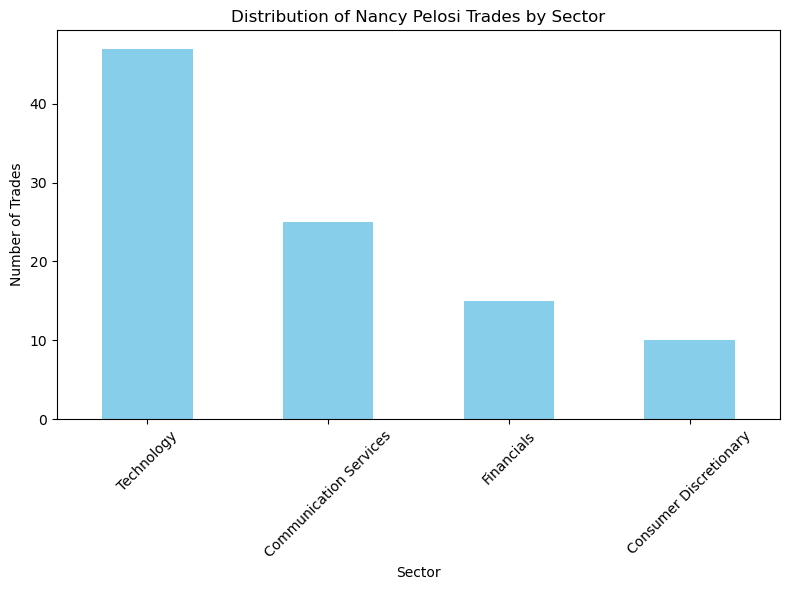

In [8]:

# Step 5: Plot the distribution of trades by sector to visualize the data

import matplotlib.pyplot as plt

# Plot the distribution of trades by sector
plt.figure(figsize=(8,6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Nancy Pelosi Trades by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()